In [4]:
import pandas as pd
import numpy as np

In [16]:
import pycaret


In [19]:
#!pip install -U --pre pycaret
#!pip install openpyxl

In [17]:
data = pd.read_excel('Bankruptcy dataset.xlsx')

In [20]:
data

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,bankruptcy?
0,0.009746,0.59288,0.006111,1.01260,-2157.3000,-0.020388,0.011053,0.686680,1.57430,0.407120,...,0.314050,0.023939,0.70510,0.190040,9.8813,5.4101,112.370,3.24820,3.0917,0
1,0.084104,0.47244,0.275890,1.64280,-3.9840,0.339550,0.084104,1.116700,3.21940,0.527560,...,0.029764,0.159420,0.97394,0.053003,10.6140,8.9620,48.661,7.50080,10.9160,0
2,-0.221670,0.86884,0.125460,1.48690,-2.8629,-0.256780,-0.202700,0.048645,0.87939,0.042265,...,-0.137150,-5.244800,1.13710,14.461000,10.1470,6.0056,76.780,4.75380,1.9856,0
3,0.011514,0.80752,-0.011056,0.98631,-251.7900,0.029182,0.014275,0.234480,1.03500,0.189350,...,0.033838,0.060808,0.96616,0.000000,1.5238,2.8550,373.180,0.97809,3.8805,0
4,0.245470,0.51585,0.244940,1.52010,5.2834,0.342680,0.293350,0.789690,1.13510,0.407360,...,0.119020,0.602580,0.88098,0.110190,13.0540,5.3119,65.837,5.54400,9.1907,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32548,0.150410,0.37615,0.143700,1.68670,12.5080,0.000000,0.188170,1.658500,2.27640,0.623850,...,0.080602,0.241100,0.91827,0.160490,37.2020,8.9376,33.551,10.87900,3.5181,0
32549,0.109590,0.65536,0.266430,1.48280,6.4640,0.000000,0.109590,0.525880,1.58160,0.344640,...,0.100400,0.317970,0.93097,0.213960,6.8177,3.1821,127.360,2.86590,8.7045,0
32550,0.200440,0.39331,0.528040,2.36630,86.9850,0.444580,0.247680,1.287100,1.16300,0.506240,...,0.140160,0.395930,0.85984,0.013511,15.8420,3.6897,71.943,5.07350,22.9370,0
32551,-0.041742,0.25776,0.257140,3.02850,32.6280,-0.054287,-0.036406,2.879600,0.96582,0.742240,...,-0.035392,-0.056238,1.03540,0.176480,3.7720,7.1974,64.208,5.68470,1.1696,0


In [21]:
from pycaret.classification import *
s = setup(data, target = 'bankruptcy?', session_id = 123)

,Description,Value
0,Session id,123
1,Target,bankruptcy?
2,Target type,Binary
3,Original data shape,"(32553, 65)"
4,Transformed data shape,"(32553, 65)"
5,Transformed train set shape,"(22787, 65)"
6,Transformed test set shape,"(9766, 65)"
7,Numeric features,64
8,Rows with missing values,54.0%
9,Preprocess,True


In [22]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [23]:
type(exp)


pycaret.classification.oop.ClassificationExperiment

In [24]:
exp.setup(data, target = 'bankruptcy?', session_id = 123)


,Description,Value
0,Session id,123
1,Target,bankruptcy?
2,Target type,Binary
3,Original data shape,"(32553, 65)"
4,Transformed data shape,"(32553, 65)"
5,Transformed train set shape,"(22787, 65)"
6,Transformed test set shape,"(9766, 65)"
7,Numeric features,64
8,Rows with missing values,54.0%
9,Preprocess,True


In [25]:
best = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9749,0.9586,0.5199,0.9278,0.6648,0.6529,0.6833,2.1810
lightgbm,Light Gradient Boosting Machine,0.9743,0.9604,0.5009,0.9351,0.6519,0.6398,0.6738,0.2440
gbc,Gradient Boosting Classifier,0.9685,0.9205,0.3898,0.8974,0.5421,0.5285,0.5789,4.0930
rf,Random Forest Classifier,0.9651,0.9168,0.3160,0.8887,0.4649,0.4512,0.5173,1.1690
ada,Ada Boost Classifier,0.9550,0.8827,0.1949,0.6047,0.2934,0.2764,0.3253,0.8150
et,Extra Trees Classifier,0.9527,0.8724,0.1166,0.5609,0.1918,0.1779,0.2390,0.4760
dummy,Dummy Classifier,0.9518,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0290
lr,Logistic Regression,0.9512,0.5511,0.0055,0.2450,0.0105,0.0083,0.0283,1.1110
ridge,Ridge Classifier,0.9512,0.0000,0.0027,0.1250,0.0053,0.0036,0.0125,0.0490
knn,K Neighbors Classifier,0.9505,0.6546,0.0856,0.4382,0.1424,0.1286,0.1764,0.1580


In [26]:
# compare models using OOP
exp.compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9749,0.9586,0.5199,0.9278,0.6648,0.6529,0.6833,0.0560
lightgbm,Light Gradient Boosting Machine,0.9743,0.9604,0.5009,0.9351,0.6519,0.6398,0.6738,0.0340
gbc,Gradient Boosting Classifier,0.9685,0.9205,0.3898,0.8974,0.5421,0.5285,0.5789,0.0380
rf,Random Forest Classifier,0.9651,0.9168,0.3160,0.8887,0.4649,0.4512,0.5173,0.0380
ada,Ada Boost Classifier,0.9550,0.8827,0.1949,0.6047,0.2934,0.2764,0.3253,0.0390
et,Extra Trees Classifier,0.9527,0.8724,0.1166,0.5609,0.1918,0.1779,0.2390,0.0460
dummy,Dummy Classifier,0.9518,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0320
lr,Logistic Regression,0.9512,0.5511,0.0055,0.2450,0.0105,0.0083,0.0283,0.0300
ridge,Ridge Classifier,0.9512,0.0000,0.0027,0.1250,0.0053,0.0036,0.0125,0.0270
knn,K Neighbors Classifier,0.9505,0.6546,0.0856,0.4382,0.1424,0.1286,0.1764,0.1060


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

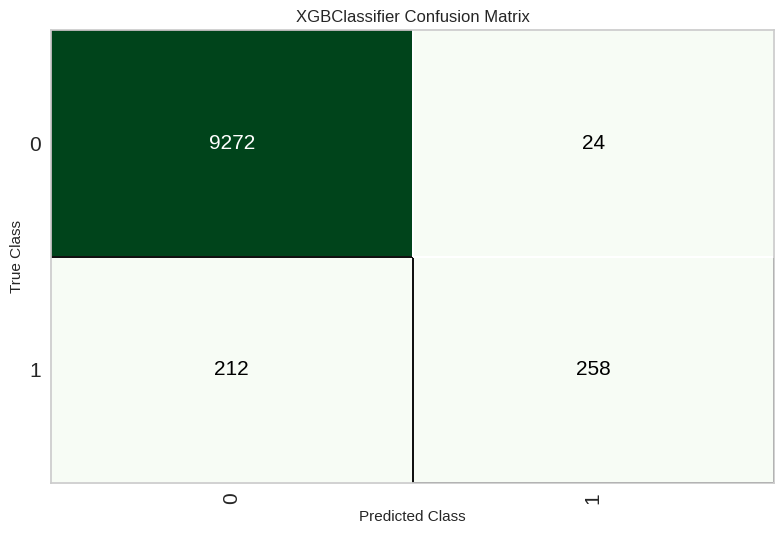

In [27]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

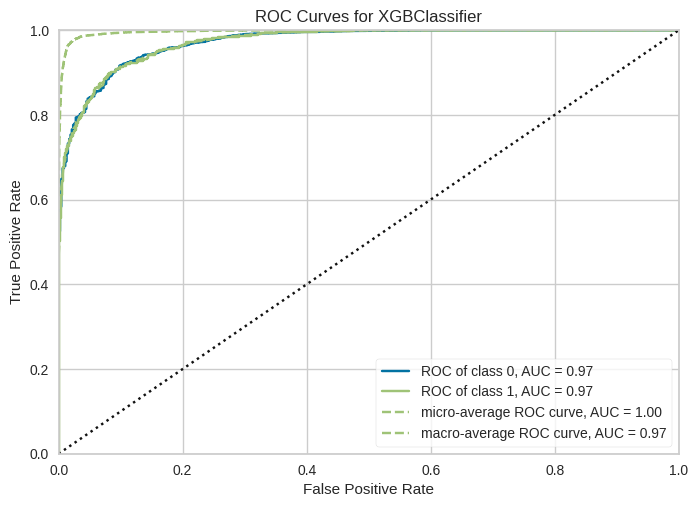

In [28]:
# plot AUC
plot_model(best, plot = 'auc')


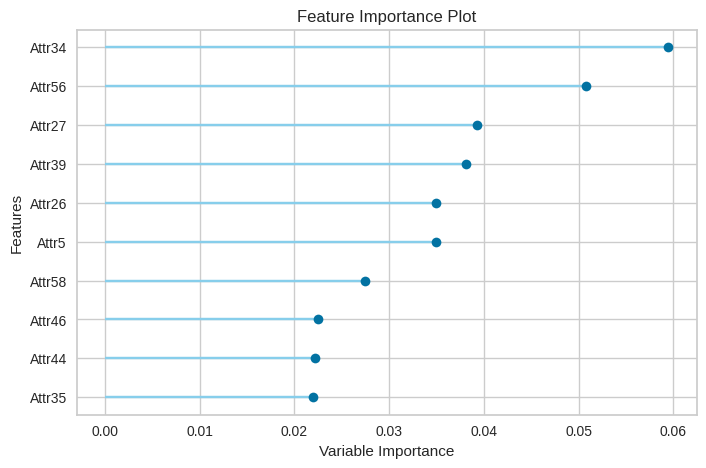

In [29]:
# plot feature importance
plot_model(best, plot = 'feature')

In [30]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [31]:
# predict on test set
holdout_pred = predict_model(best)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9758,0.9723,0.5489,0.9149,0.6862,0.6744,0.6983


In [32]:
# show predictions df
holdout_pred.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,bankruptcy?,prediction_label,prediction_score
22787,0.059094,0.74261,0.103200,1.19460,-34.477001,0.000000,0.067785,0.34660,1.20660,0.25739,...,0.94828,0.66737,6.6178,3.136700,160.440002,2.275000,3.2931,0,0,0.9933
22788,-0.614380,1.75190,-0.802790,0.38135,-429.230011,-0.863730,-0.614380,-0.43567,0.75409,-0.76324,...,1.32610,-0.59514,3.3987,3.177500,633.789978,0.575900,1.4794,0,0,0.9983
22789,0.197860,0.17371,0.227030,5.15350,15.141000,0.000000,0.244480,4.75660,1.35410,0.82629,...,0.81976,0.14408,7.5041,23.204000,14.734000,24.773001,1.8851,0,0,0.9998
22790,-0.089430,0.49247,0.030252,1.06950,-64.587997,0.076433,-0.109160,1.02870,0.96214,0.50658,...,1.03930,0.11240,5.6319,25.433001,81.125999,4.499200,3.6681,0,0,0.9999
22791,0.101030,0.42758,0.357800,1.83680,-114.550003,0.000000,0.101030,1.33880,1.07160,0.57242,...,0.80323,0.00000,1.6979,9.359900,145.639999,2.506200,4.9930,0,0,1.0000


In [33]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('bankruptcy?', axis=1, inplace=True)
new_data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.009746,0.59288,0.006111,1.01260,-2157.3000,-0.020388,0.011053,0.686680,1.57430,0.407120,...,281.67,0.314050,0.023939,0.70510,0.190040,9.8813,5.4101,112.370,3.24820,3.0917
1,0.084104,0.47244,0.275890,1.64280,-3.9840,0.339550,0.084104,1.116700,3.21940,0.527560,...,650.07,0.029764,0.159420,0.97394,0.053003,10.6140,8.9620,48.661,7.50080,10.9160
2,-0.221670,0.86884,0.125460,1.48690,-2.8629,-0.256780,-0.202700,0.048645,0.87939,0.042265,...,35170.00,-0.137150,-5.244800,1.13710,14.461000,10.1470,6.0056,76.780,4.75380,1.9856
3,0.011514,0.80752,-0.011056,0.98631,-251.7900,0.029182,0.014275,0.234480,1.03500,0.189350,...,-517.49,0.033838,0.060808,0.96616,0.000000,1.5238,2.8550,373.180,0.97809,3.8805
4,0.245470,0.51585,0.244940,1.52010,5.2834,0.342680,0.293350,0.789690,1.13510,0.407360,...,1938.90,0.119020,0.602580,0.88098,0.110190,13.0540,5.3119,65.837,5.54400,9.1907


In [34]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,prediction_label,prediction_score
0,0.009746,0.59288,0.006111,1.01260,-2157.300049,-0.020388,0.011053,0.686680,1.57430,0.407120,...,0.023939,0.70510,0.190040,9.8813,5.4101,112.370003,3.24820,3.0917,0,0.9981
1,0.084104,0.47244,0.275890,1.64280,-3.984000,0.339550,0.084104,1.116700,3.21940,0.527560,...,0.159420,0.97394,0.053003,10.6140,8.9620,48.660999,7.50080,10.9160,0,0.9971
2,-0.221670,0.86884,0.125460,1.48690,-2.862900,-0.256780,-0.202700,0.048645,0.87939,0.042265,...,-5.244800,1.13710,14.461000,10.1470,6.0056,76.779999,4.75380,1.9856,0,1.0000
3,0.011514,0.80752,-0.011056,0.98631,-251.789993,0.029182,0.014275,0.234480,1.03500,0.189350,...,0.060808,0.96616,0.000000,1.5238,2.8550,373.179993,0.97809,3.8805,0,0.9970
4,0.245470,0.51585,0.244940,1.52010,5.283400,0.342680,0.293350,0.789690,1.13510,0.407360,...,0.602580,0.88098,0.110190,13.0540,5.3119,65.836998,5.54400,9.1907,0,1.0000


In [35]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('clean_column_names',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Attr1', 'Attr2', 'Attr3', 'Attr4',
                                              'Attr5', 'Attr6', 'Attr7', 'Attr8',
                                              'Attr9', 'Attr10', 'Attr11',
                                              'Attr12', '...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_onehot=None, max_delta_step=None,
                                max_depth=None, ma

In [36]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Attr1', 'Attr2', 'Attr3', 'Attr4',
                                             'Attr5', 'Attr6', 'Attr7', 'Attr8',
                                             'Attr9', 'Attr10', 'Attr11',
                                             'Attr12', '...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=-1, num_parallel_tree=None,
                               objective='binary:logistic', predictor=None, ...))],
         verbose=False)

In [38]:
#Detail Setup
s = setup(data, target = 'bankruptcy?', session_id = 123)


,Description,Value
0,Session id,123
1,Target,bankruptcy?
2,Target type,Binary
3,Original data shape,"(32553, 65)"
4,Transformed data shape,"(32553, 65)"
5,Transformed train set shape,"(22787, 65)"
6,Transformed test set shape,"(9766, 65)"
7,Numeric features,64
8,Rows with missing values,54.0%
9,Preprocess,True


In [39]:

# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [40]:
# lets access X_train_transformed
get_config('X_train_transformed')

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.053185,0.008564,0.566720,67.177002,43.745998,0.557920,0.066924,114.989998,1.77890,0.98477,...,122570.000000,0.437850,0.054007,0.56215,0.00000,228.785294,10.963000,41.443001,8.8072,0.177590
1,0.021230,0.074419,0.882140,12.854000,252.429993,0.088681,0.036837,12.437000,1.07400,0.92558,...,6842.500000,0.068941,0.022937,0.93106,0.00000,2.604100,9.443500,31.790001,11.4820,19.667999
2,0.121560,0.373640,0.530980,2.421100,66.975998,0.000000,0.121560,1.676300,2.03200,0.62636,...,1246.800049,0.295680,0.194080,0.71988,0.00000,7.602200,5.407700,67.115997,5.4384,21.306000
3,0.057515,0.609350,0.172430,1.514900,-5.170300,0.156680,0.075779,0.633860,1.05240,0.38625,...,2781.500000,0.049755,0.148910,0.95025,0.71060,10.111000,6.653900,63.452000,5.7524,3.910000
4,0.014594,0.867540,-0.083137,0.889120,-125.559998,0.044979,0.018698,0.149640,1.02040,0.12982,...,-3710.699951,0.019994,0.112420,0.98001,0.90722,3.719700,5.080800,208.210007,1.7531,3.942700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22782,-0.194310,0.285510,0.404180,3.617300,48.064999,0.000000,-0.194800,2.501700,2.09870,0.71425,...,1662.000000,-0.083198,-0.272050,1.09190,0.00000,19.569000,33.320000,26.857000,13.5910,4.757400
22783,0.106270,0.688110,0.067797,1.107400,4.360300,0.000000,0.139360,0.453260,3.43880,0.31189,...,765.059998,0.046150,0.340730,0.95975,0.00000,129.270004,5.190400,67.000000,5.4478,11.425000
22784,0.013619,0.013866,0.393730,38.368999,44.141998,0.042723,0.018078,70.415001,0.89290,0.97638,...,50572.000000,-0.119940,0.013948,1.11990,0.00341,2.191100,9.048700,89.347000,4.0852,0.072251
22785,-0.049810,0.279680,0.367260,2.313100,-17.549000,0.000000,-0.060682,2.575500,0.86114,0.72032,...,2247.399902,-0.073174,-0.069149,1.06910,0.00000,2.146200,3.654400,118.540001,3.0790,2.439000


In [41]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [42]:
# init setup with normalize = True

s = setup(data, target =  'bankruptcy?', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,bankruptcy?
2,Target type,Binary
3,Original data shape,"(32553, 65)"
4,Transformed data shape,"(32553, 65)"
5,Transformed train set shape,"(22787, 65)"
6,Transformed test set shape,"(9766, 65)"
7,Numeric features,64
8,Rows with missing values,54.0%
9,Preprocess,True
